# 12주차 과제 코드입력(자동차 분류 )
## 데이터 준비

In [278]:
library(ggplot2)
library(graphics)

In [295]:
library(extrafont)

In [298]:
font_import(pattern = "Nanum")

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
 : NanumGothicCoding-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
 : NanumGothicCoding already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /opt/conda/lib/R/library/extrafontdb/metrics

Warning message in grepl("^FamilyName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FontName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FullName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^Weight", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FamilyName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FontName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^F

In [299]:
loadfonts()

Registering font with R using pdfFonts(): NanumGothicCoding



In [307]:
par(family = 'NanumGothicCoding') # the default of R

In [1]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


## 클러스터링 대상 데이터 세트 만들기
- 엔진마력: hp(gross horsepower), 연비: mpg(miles per gallon)

### 과제 1. 코드조건에 맞는 코드는 R스크립트 파일에 입력하고, 코드 실행 결과 만들어 진 산점도를 화면캡쳐
> 데이터 분포 파악을 위해 x축(xlab)은 "엔진마력", y축(ylab)은 "연비"로 하는 산점도를 그리되, plot명령어를 사용할 것

In [41]:
data <- cbind(mtcars$hp, mtcars$mpg)
head(data)

110,21.0
110,21.0
93,22.8
110,21.4
175,18.7
105,18.1


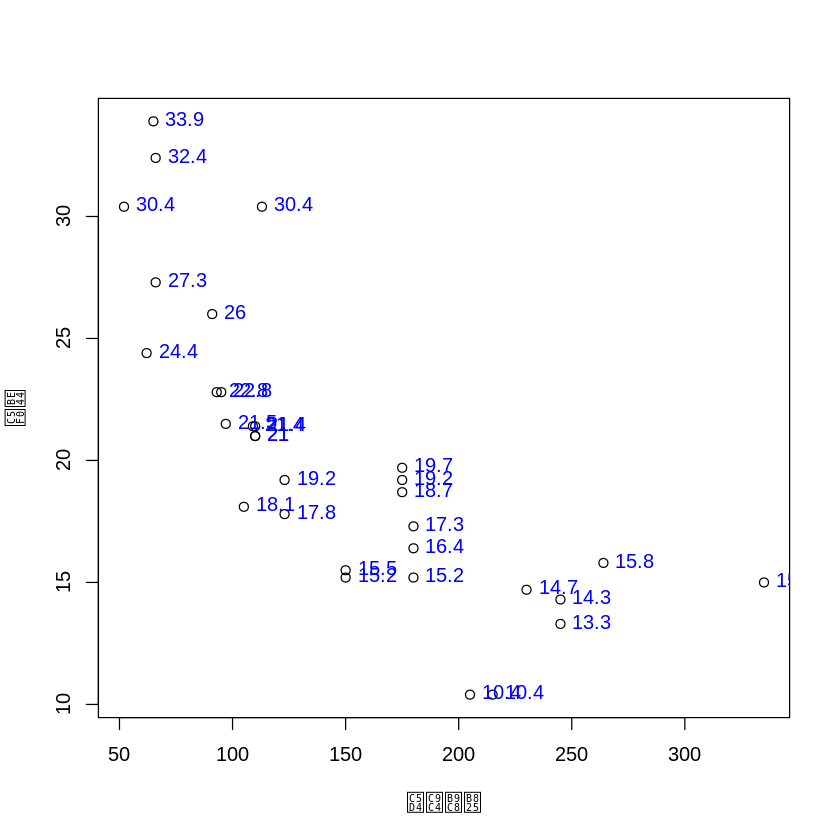

In [308]:
plot(data, xlab="엔진마력", ylab="연비")
text(data[,1],data[,2], data[,2],pos=4, col = "blue")

In [34]:
# 데이터 표준화
data.scaled <- as.data.frame(scale(data, center=TRUE, scale=TRUE))
data.scaled

V1,V2
<dbl>,<dbl>
-0.53509284,0.15088482
-0.53509284,0.15088482
-0.78304046,0.44954345
-0.53509284,0.21725341
0.41294217,-0.23073453
-0.60801861,-0.33028740
1.43390296,-0.96078893
-1.23518023,0.71501778
-0.75387015,0.44954345


### 과제 2  적정 군집수를 찾아내는 과정에 관한 것입니다.
#### 2-1) 군집수의 변화에 따른 withinss의 변화를 추적합니다.
> 군집수에 따라 withinss의 변화를 저장하는 코드를 for문을 이용하여 작성합 니다. 군집명령어는 kmeans 사용 (단, 군집의 수는 9개까지, withinss값은 twss라는 변수를 만들어서 저장)

In [84]:
twss <- NULL

In [85]:
for(i in 1:9){
    kc <- kmeans(data.scaled, centers = i)
    twss <- c(twss, kc$tot.withinss)
}
twss

[1] 62.000000 23.145513 13.163383  7.530633  5.605966  5.760518  3.454072
[8]  3.060618  2.559809

#### 2-2) 군집수의 변화를 선그래프로 표현하는 코드를 작성하고 코드 실행결과 작 성된 선그래프를 화면캡쳐.
> 군집에 따른 withinss의 변화를 살펴보기 위해 x축(xlab)은 "군집수", y축 (ylab)은 "TWSS"로 하는 선그래프를 그리되, plot명령어를 사용할 것(단, 군 집의 수는 9개까지)

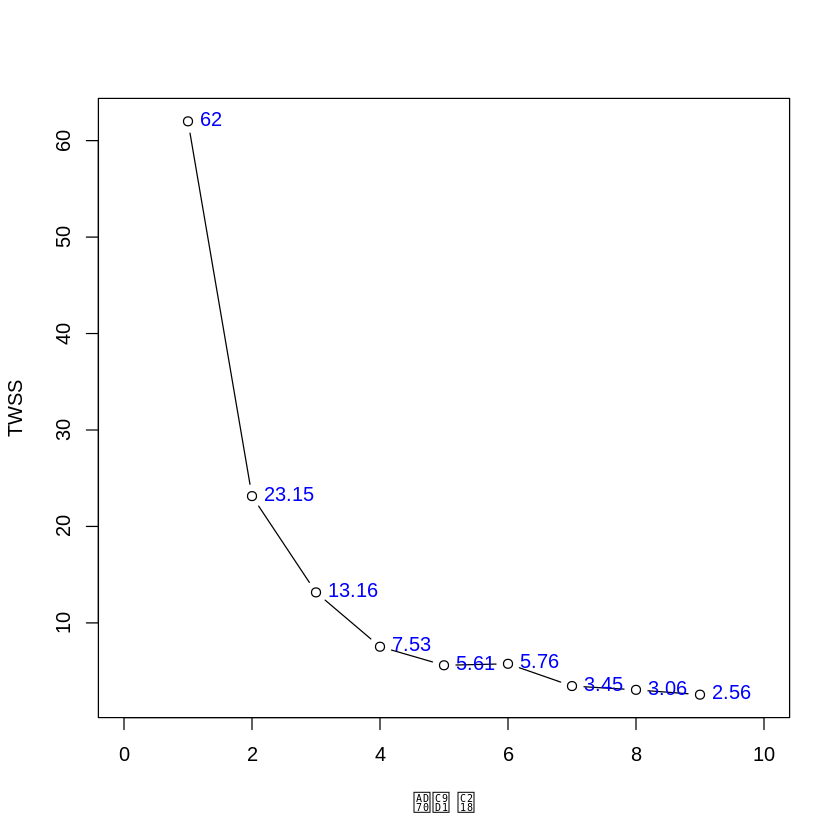

In [291]:
plot(1:9 , twss,xlim=c(0,10), type="b", xlab="군집 수", ylab="TWSS")
text(1:9, twss, round(twss, 2), pos=4,cex =1, col = "blue")

#### 2-3) 그래프를 보고 적정 군집수를 결정하여 

In [232]:
k <- 4

### 과제 3. 적정 군집수를 이용하여 군집분석을 다시 실시합니다.

In [320]:
kc <- kmeans(data, centers = k)
class(kc)
kc

[1] "kmeans"

K-means clustering with 4 clusters of sizes 8, 6, 17, 1

Cluster means:
       [,1]     [,2]
1 170.62500 17.15000
2 234.00000 13.15000
3  93.52941 24.22353
4 335.00000 15.00000

Clustering vector:
 [1] 3 3 3 3 1 3 2 3 3 3 3 1 1 1 2 2 2 3 3 3 3 1 1 2 1 3 3 3 2 1 4 3

Within cluster sum of squares by cluster:
[1] 1195.895 2385.895 8771.866    0.000
 (between_SS / total_SS =  91.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

### 과제 4. 각 군집의 결과 속성 3가지 (cluster, centers, withinss)를 출력하는 코드를 작성하고, 가장 강력한 결합력을 가진 군집이 몇 번인지 결정하고 그 이유를 설명합니다.

In [332]:
kc$cluster
kc$centers
kc$withinss

[1] 3 3 3 3 1 3 2 3 3 3 3 1 1 1 2 2 2 3 3 3 3 1 1 2 1 3 3 3 2 1 4 3

1,170.62500,17.15000
2,234.00000,13.15000
3,93.52941,24.22353
4,335.00000,15.00000


[1] 1195.895 2385.895 8771.866    0.000

In [322]:
par(mar=c(5.1, 4.1, 4.1, 7))

### 과제 5. 군집결과를 그래프로 출력하는 코드를 입력하고 결과를 화면캡쳐하여 한글 또는 워드파일에 삽입합니다.
#### 과제 5-1) 자동차 데이터를 군집별로 색상을 다르게 표현하여 구분하는 그래프를 작성합니다.
> x축(xlab)은 "엔진마력", y축(ylab)은 "연비"로 하는 산점도를 그리되, plot명 령어를 사용, 점의 색상은 군집의 군집번호(cluster)를 사용할 것

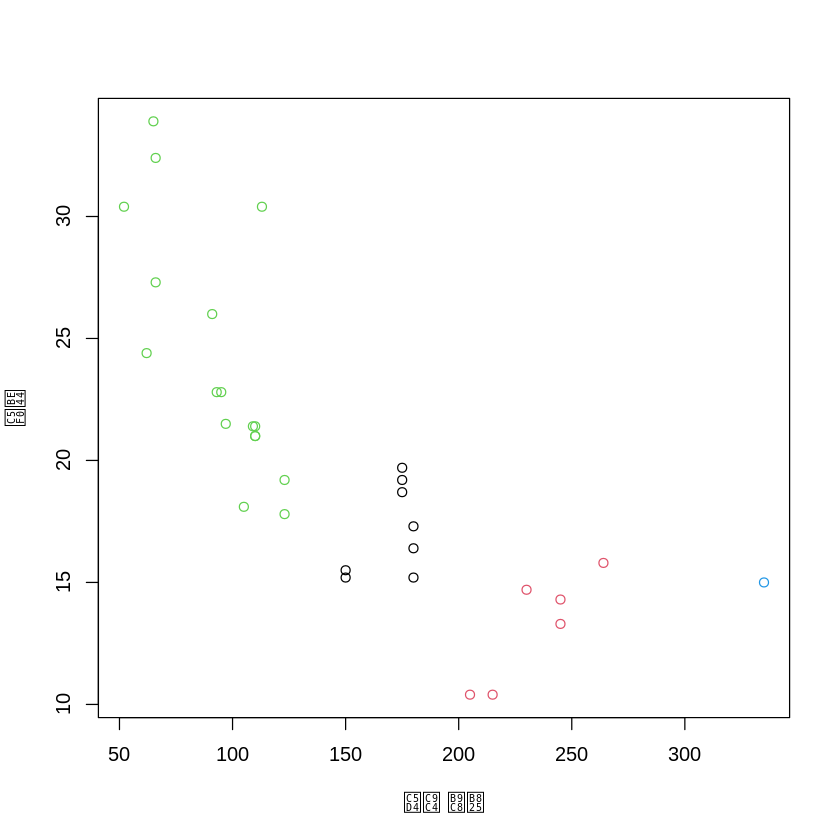

In [323]:
plot(data, xlab="엔진 마력", ylab="연비" , col = kc$cluster )

#### 5-2) 위 그래프에 군집의 중심점을 추가합니다.

> 위 5-1)번 점그래프 위에 각 군집의 중심점을 그려넣되, point명령어를 사용. 점의 색상은 군집중심점(centers)의 컬럼명(rownames이용)를 사용할 것

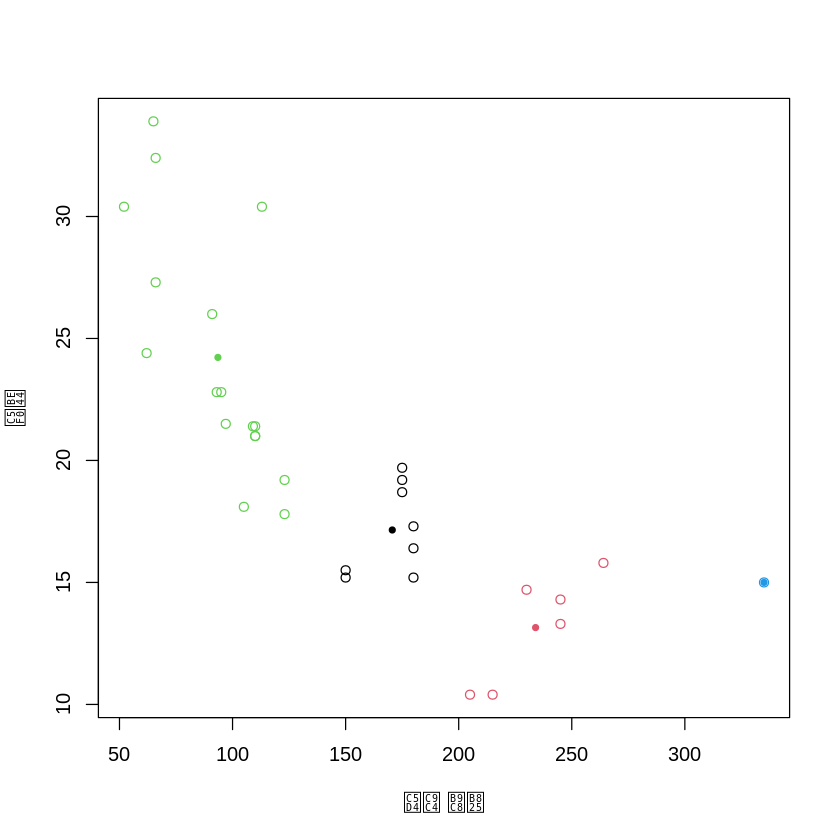

In [329]:
plot(data, xlab="엔진 마력", ylab="연비" , col = kc$cluster)
points(kc$centers,pch=20, col=rownames(kc$centers))

#### 5-3) 위 그래프에 군집의 중심점의 번호를 추가합니다.
> 위 5-2)번 점그래프 옆에 각 군집의 번호를 입력하되, text명령어를 사용. 군 집번호는 군집중심점(centers)의 컬럼명(rownames이용)를 사용, 컬러(col)는 검은색으로 함

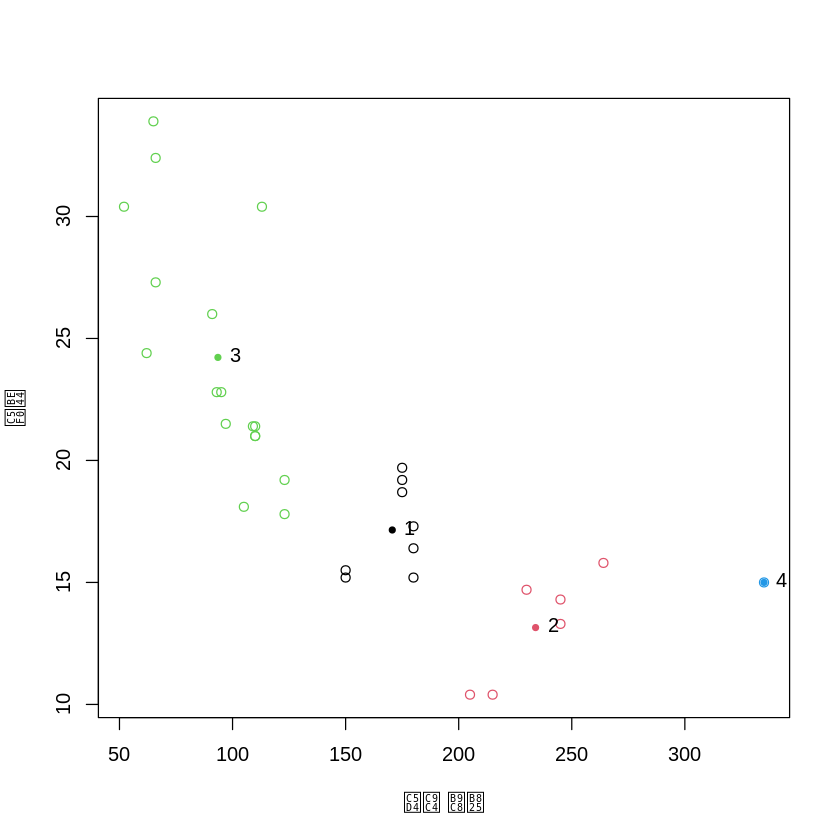

In [331]:
options(repr.plot.width=7, repr.plot.height=7)
plot(data, xlab="엔진 마력", ylab="연비" , col = kc$cluster)
points(kc$centers,pch=20, col=rownames(kc$centers))
text(kc$centers[,1],kc$centers[,2],rownames(kc$centers),pos=4,cex =1,col = "black")